In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from IPython.core.display import HTML
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
from scipy.stats import uniform
import matplotlib.colors as mcolors

In [2]:
My_data = pd.read_csv(r"C:\Users\nibug\Videos\Dissertation\proc_heart_cleve_3_withheader.csv")
print ('Dissertation dataset is', My_data.shape)


Dissertation dataset is (299, 19)


In [3]:
My_data.head()

,Disease,Age,Sex,ind_typ_angina,ind_atyp_angina,ind_non_ang_pain,resting_BP,Serum_cholest,blood_sugar_exc120,ind_for_ecg_1,ind_for_ecg_2,Max_heart_rate,ind_exerc_angina,ST_dep_by_exerc,ind_for_slope_up_exerc,ind_for_slope_down_exerc,num_vessels_fluro,Thal_rev_defect,Thal_fixed_defect
0,-1,63,1,1,0,0,145,233,1,0,1,150,0,2.3,0,1,0,0,1
1,1,67,1,0,0,0,160,286,0,0,1,108,1,1.5,0,0,3,0,0
2,1,67,1,0,0,0,120,229,0,0,1,129,1,2.6,0,0,2,1,0
3,-1,37,1,0,0,1,130,250,0,0,0,187,0,3.5,0,1,0,0,0
4,-1,41,0,0,1,0,130,204,0,0,1,172,0,1.4,1,0,0,0,0


In [4]:
My_data.dtypes

Disease                       int64
Age                           int64
Sex                           int64
ind_typ_angina                int64
ind_atyp_angina               int64
ind_non_ang_pain              int64
resting_BP                    int64
Serum_cholest                 int64
blood_sugar_exc120            int64
ind_for_ecg_1                 int64
ind_for_ecg_2                 int64
Max_heart_rate                int64
ind_exerc_angina              int64
ST_dep_by_exerc             float64
ind_for_slope_up_exerc        int64
ind_for_slope_down_exerc      int64
num_vessels_fluro             int64
Thal_rev_defect               int64
Thal_fixed_defect             int64
dtype: object

In [5]:
My_data['Target'] = My_data['Disease'].replace({-1: 0, 1: 1})

In [6]:
My_data ['Sex'][My_data['Sex']==0]='female'
My_data ['Sex'][My_data['Sex']==1]='male'
My_data ['ind_typ_angina'][My_data['ind_typ_angina']==1]='Typical angina'
My_data ['ind_typ_angina'][My_data['ind_typ_angina']==0]='otherwise'
My_data ['ind_atyp_angina'][My_data['ind_atyp_angina']==1]='Atypical angina'
My_data ['ind_atyp_angina'][My_data['ind_atyp_angina']==0]='otherwise'
My_data ['ind_non_ang_pain'][My_data['ind_non_ang_pain']==1]='Non-angina pain'
My_data ['ind_non_ang_pain'][My_data['ind_non_ang_pain']==0]='otherwise'
My_data ['blood_sugar_exc120'][My_data['blood_sugar_exc120']==1]='greater than 120mg/ml'
My_data ['blood_sugar_exc120'][My_data['blood_sugar_exc120']==0]='lower than 120mg/ml'
My_data ['ind_for_ecg_1'][My_data['ind_for_ecg_1']==1]='ECG result type 1'
My_data ['ind_for_ecg_1'][My_data['ind_for_ecg_1']==0]='otherwise'
My_data ['ind_for_ecg_2'][My_data['ind_for_ecg_2']==1]='ECG result type 2'
My_data ['ind_for_ecg_2'][My_data['ind_for_ecg_2']==0]='otherwise'
My_data ['ind_exerc_angina'][My_data['ind_exerc_angina']==1]='Yes'
My_data ['ind_exerc_angina'][My_data['ind_exerc_angina']==0]='No'
My_data ['ind_for_slope_up_exerc'][My_data['ind_for_slope_up_exerc']==1]='Upsloping'
My_data ['ind_for_slope_up_exerc'][My_data['ind_for_slope_up_exerc']==0]='otherwise'
My_data ['ind_for_slope_down_exerc'][My_data['ind_for_slope_down_exerc']==1]='Downsloping'
My_data ['ind_for_slope_down_exerc'][My_data['ind_for_slope_down_exerc']==0]='otherwise'
My_data ['Thal_rev_defect'][My_data['Thal_rev_defect']==1]='reversable defect'
My_data ['Thal_rev_defect'][My_data['Thal_rev_defect']==0]='otherwise'
My_data ['Thal_fixed_defect'][My_data['Thal_fixed_defect']==1]='fixed defect'
My_data ['Thal_fixed_defect'][My_data['Thal_fixed_defect']==0]='otherwise'
My_data ['Target'][My_data['Target']==1]='Disease'
My_data ['Target'][My_data['Target']==0]='No disease'

C:\Users\nibug\AppData\Local\Temp\ipykernel_8156\3360738343.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  My_data ['Sex'][My_data['Sex']==0]='female'
C:\Users\nibug\AppData\Local\Temp\ipykernel_8156\3360738343.py:1: SettingWithCopyWarn

In [7]:
My_data.head()

,Disease,Age,Sex,ind_typ_angina,ind_atyp_angina,ind_non_ang_pain,resting_BP,Serum_cholest,blood_sugar_exc120,ind_for_ecg_1,ind_for_ecg_2,Max_heart_rate,ind_exerc_angina,ST_dep_by_exerc,ind_for_slope_up_exerc,ind_for_slope_down_exerc,num_vessels_fluro,Thal_rev_defect,Thal_fixed_defect,Target
0,-1,63,male,Typical angina,otherwise,otherwise,145,233,greater than 120mg/ml,otherwise,ECG result type 2,150,No,2.3,otherwise,Downsloping,0,otherwise,fixed defect,No disease
1,1,67,male,otherwise,otherwise,otherwise,160,286,lower than 120mg/ml,otherwise,ECG result type 2,108,Yes,1.5,otherwise,otherwise,3,otherwise,otherwise,Disease
2,1,67,male,otherwise,otherwise,otherwise,120,229,lower than 120mg/ml,otherwise,ECG result type 2,129,Yes,2.6,otherwise,otherwise,2,reversable defect,otherwise,Disease
3,-1,37,male,otherwise,otherwise,Non-angina pain,130,250,lower than 120mg/ml,otherwise,otherwise,187,No,3.5,otherwise,Downsloping,0,otherwise,otherwise,No disease
4,-1,41,female,otherwise,Atypical angina,otherwise,130,204,lower than 120mg/ml,otherwise,ECG result type 2,172,No,1.4,Upsloping,otherwise,0,otherwise,otherwise,No disease


In [8]:
My_data.dtypes

Disease                       int64
Age                           int64
Sex                          object
ind_typ_angina               object
ind_atyp_angina              object
ind_non_ang_pain             object
resting_BP                    int64
Serum_cholest                 int64
blood_sugar_exc120           object
ind_for_ecg_1                object
ind_for_ecg_2                object
Max_heart_rate                int64
ind_exerc_angina             object
ST_dep_by_exerc             float64
ind_for_slope_up_exerc       object
ind_for_slope_down_exerc     object
num_vessels_fluro             int64
Thal_rev_defect              object
Thal_fixed_defect            object
Target                       object
dtype: object

In [9]:
num_variables = ['Age','resting_BP','Serum_cholest','Max_heart_rate','ST_dep_by_exerc','num_vessels_fluro']

cat_variables = ['Sex','ind_typ_angina','ind_atyp_angina','ind_non_ang_pain','blood_sugar_exc120','ind_for_ecg_1','ind_for_ecg_2','ind_exerc_angina','ind_for_slope_up_exerc','ind_for_slope_down_exerc','Thal_rev_defect','Thal_fixed_defect','Target']

In [10]:
My_data.head()

,Disease,Age,Sex,ind_typ_angina,ind_atyp_angina,ind_non_ang_pain,resting_BP,Serum_cholest,blood_sugar_exc120,ind_for_ecg_1,ind_for_ecg_2,Max_heart_rate,ind_exerc_angina,ST_dep_by_exerc,ind_for_slope_up_exerc,ind_for_slope_down_exerc,num_vessels_fluro,Thal_rev_defect,Thal_fixed_defect,Target
0,-1,63,male,Typical angina,otherwise,otherwise,145,233,greater than 120mg/ml,otherwise,ECG result type 2,150,No,2.3,otherwise,Downsloping,0,otherwise,fixed defect,No disease
1,1,67,male,otherwise,otherwise,otherwise,160,286,lower than 120mg/ml,otherwise,ECG result type 2,108,Yes,1.5,otherwise,otherwise,3,otherwise,otherwise,Disease
2,1,67,male,otherwise,otherwise,otherwise,120,229,lower than 120mg/ml,otherwise,ECG result type 2,129,Yes,2.6,otherwise,otherwise,2,reversable defect,otherwise,Disease
3,-1,37,male,otherwise,otherwise,Non-angina pain,130,250,lower than 120mg/ml,otherwise,otherwise,187,No,3.5,otherwise,Downsloping,0,otherwise,otherwise,No disease
4,-1,41,female,otherwise,Atypical angina,otherwise,130,204,lower than 120mg/ml,otherwise,ECG result type 2,172,No,1.4,Upsloping,otherwise,0,otherwise,otherwise,No disease


In [11]:
mycolors= ['#FC05FB','#FEAEFE','#FCD2FC','#F3FEFA','#B4FFE4','#3FFEBA']

C:\Users\nibug\AppData\Local\Temp\ipykernel_8156\121421248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=My_data['Target'], palette=mycolors[1::4])


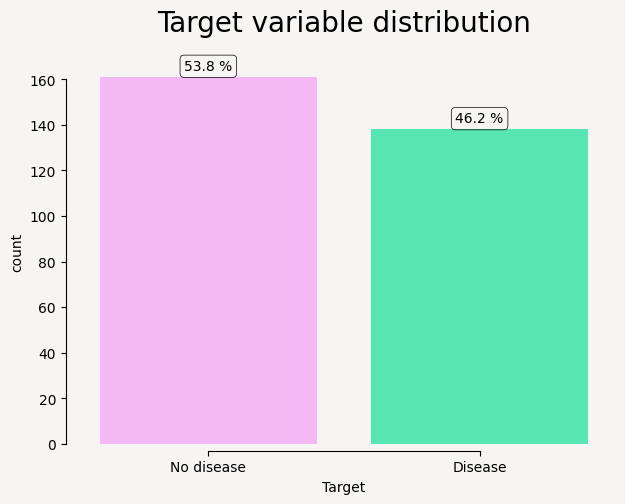

In [12]:
plt.figure(figsize=(7, 5),facecolor='#F6F5F4')
total = float(len(My_data))
ax = sns.countplot(x=My_data['Target'], palette=mycolors[1::4])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Target variable distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

In [13]:
My_data[num_variables].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,299.0,54.528428,9.020950,29.0,48.0,56.0,61.0,77.0
resting_BP,299.0,131.668896,17.705668,94.0,120.0,130.0,140.0,200.0
Serum_cholest,299.0,247.100334,51.914779,126.0,211.0,242.0,275.5,564.0
Max_heart_rate,299.0,149.505017,22.954927,71.0,133.0,153.0,165.5,202.0
ST_dep_by_exerc,299.0,1.051839,1.163809,0.0,0.0,0.8,1.6,6.2
num_vessels_fluro,299.0,0.672241,0.937438,0.0,0.0,0.0,1.0,3.0


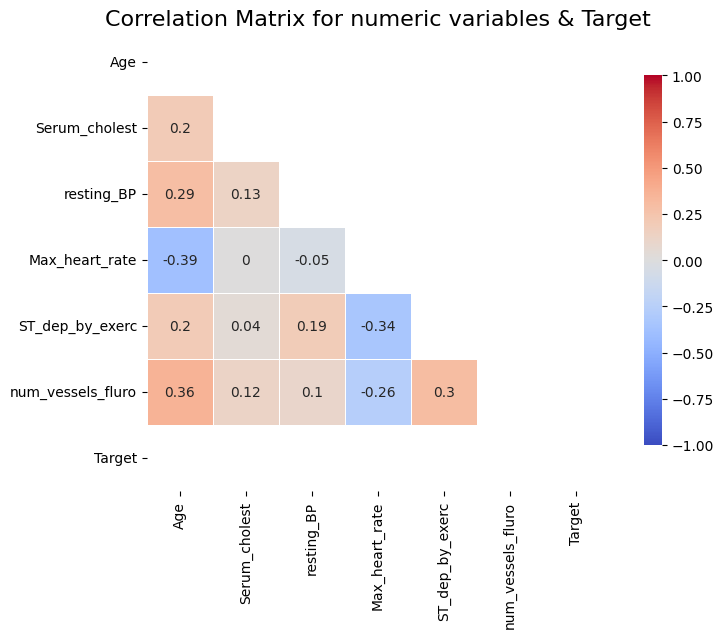

In [14]:
features = ['Age', 'Serum_cholest', 'resting_BP', 'Max_heart_rate', 'ST_dep_by_exerc', 'num_vessels_fluro','Target']
for col in features:
    My_data[col] = pd.to_numeric(My_data[col], errors='coerce') 
def point_biserial(x, y):
    pb = stats.pointbiserialr(x, y)
    return pb[0]

rows= []
for x in features:
    col = []
    for y in features :
        pbs =point_biserial(My_data[x], My_data[y]) 
        col.append(round(pbs,2))  
    rows.append(col)  
    
pbs_results = np.array(rows)
DF = pd.DataFrame(pbs_results, columns = My_data[features].columns, index =My_data[features].columns)
##setting diagnols to nan
np.fill_diagonal(pbs_results, np.nan)
##creating an upper triangle mask
mask = np.triu(np.ones_like(DF, dtype=bool))
corr = DF.mask(mask)

f, ax = plt.subplots(figsize=(9, 6), facecolor=None)
cmap = sns.color_palette(mycolors, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap="coolwarm", vmax=1, vmin=-1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.8})
ax.set_title("Correlation Matrix for numeric variables & Target", fontsize=16, pad= 1.05);

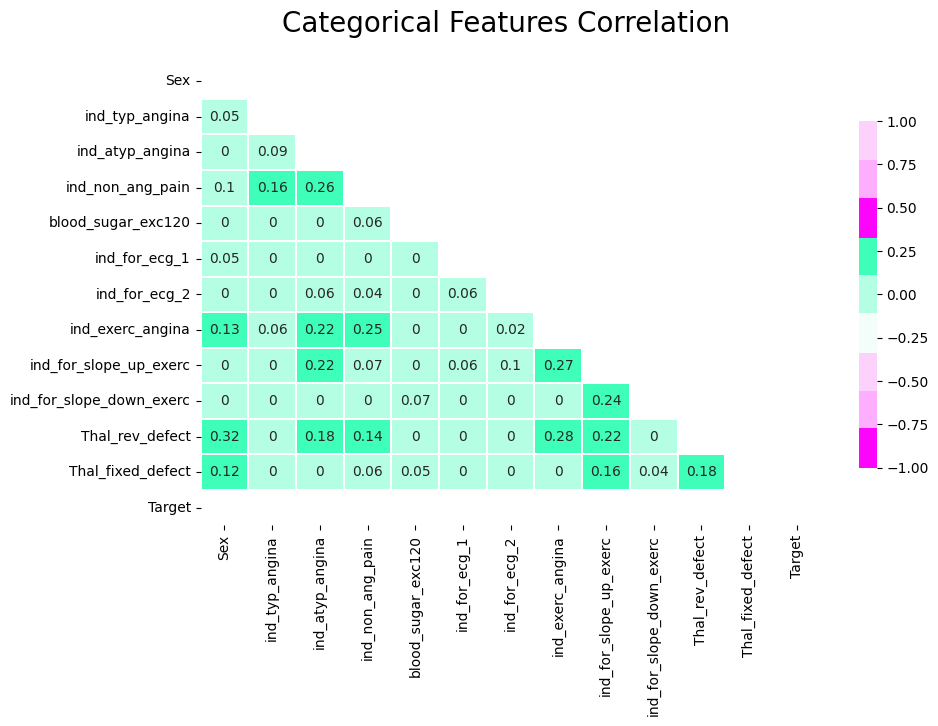

In [15]:
def cramers_v(x, y): 
    confusion_matrix = pd.crosstab(x,y)
    if confusion_matrix.empty:
        return np.nan
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# calculate the correlation coefficients using the above function
data_ = My_data[cat_variables]
rows= []
for x in data_:
    col = []
    for y in data_ :
        cramers =cramers_v(data_[x], data_[y]) 
        col.append(round(cramers,2))
    rows.append(col)
    
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_.columns, index = data_.columns)

# color palette 
mypal_1= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA', '#FC05FB', '#FEAEFE', '#FCD2FC']
# plot the heat map
mask = np.triu(np.ones_like(df, dtype=bool))
corr = df.mask(mask)
f, ax = plt.subplots(figsize=(10, 6), facecolor=None)
cmap = sns.color_palette(mypal_1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1, center=0, annot=True,
            square=False, linewidths=.01, cbar_kws={"shrink": 0.75})
ax.set_title("Categorical Features Correlation ", fontsize=20, y= 1.05);

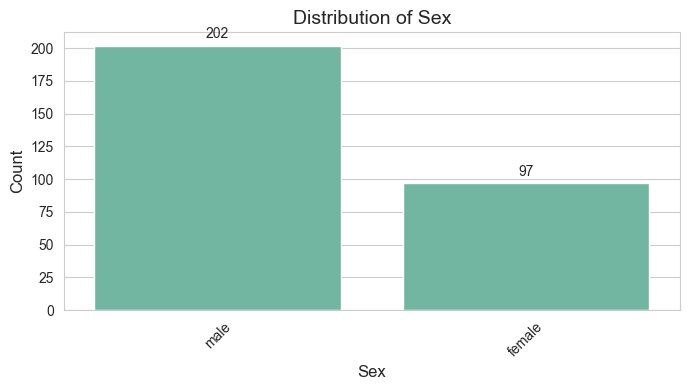

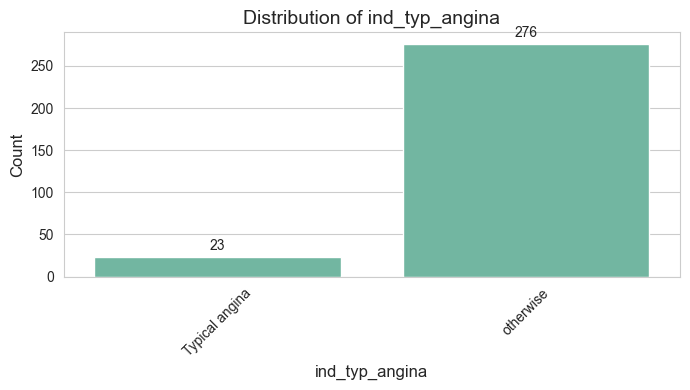

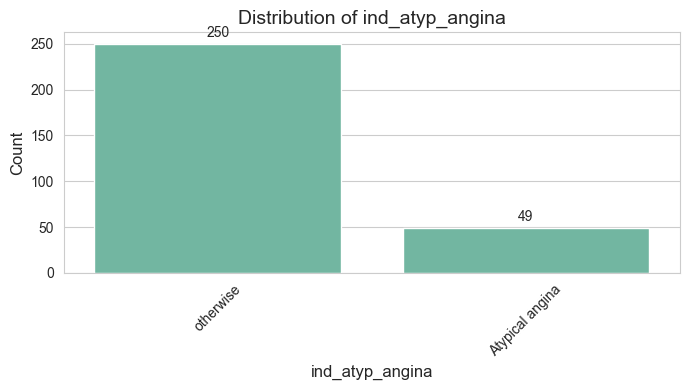

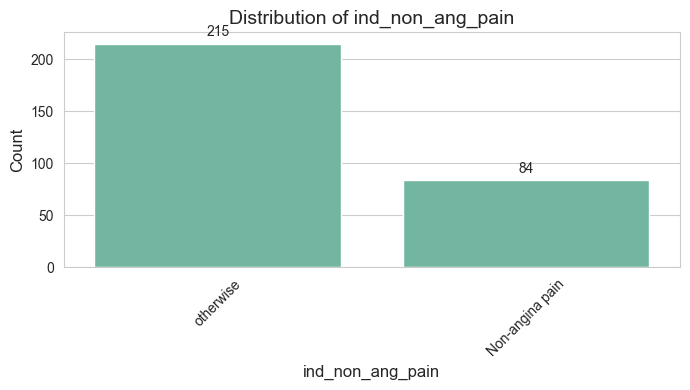

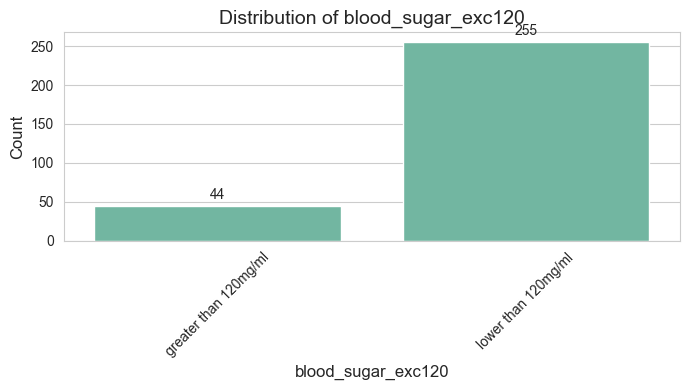

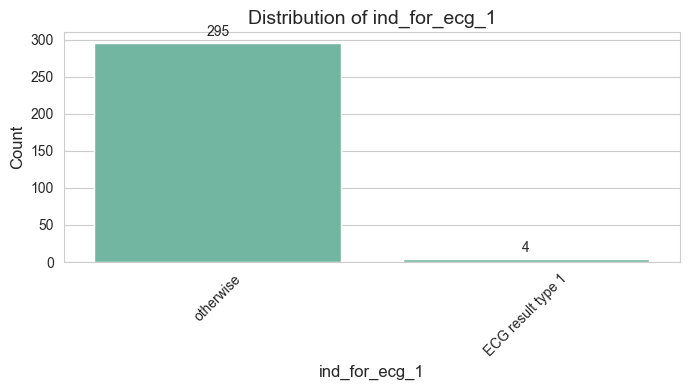

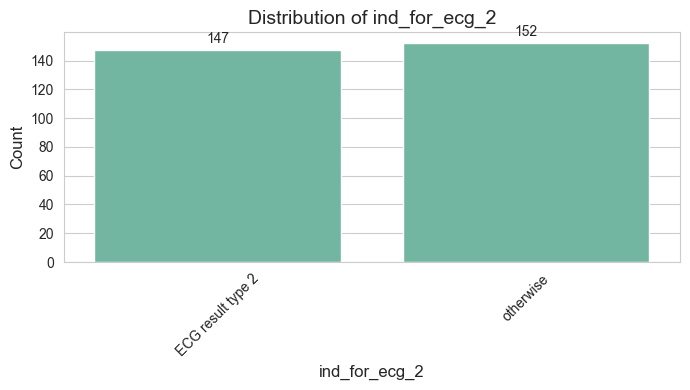

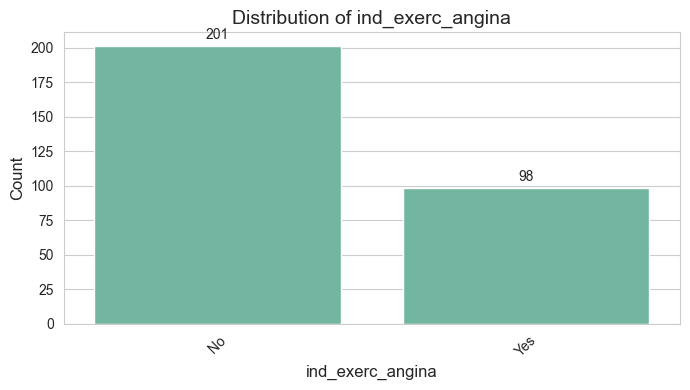

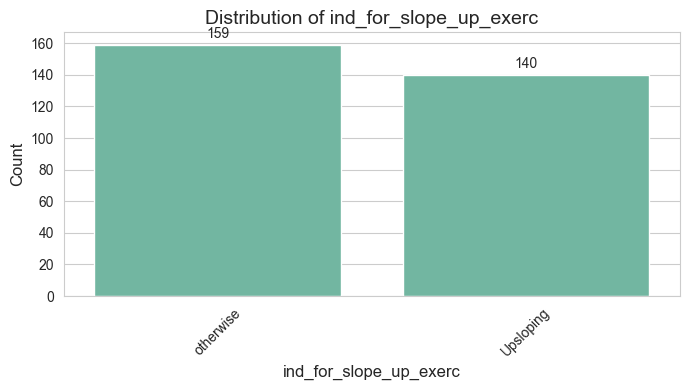

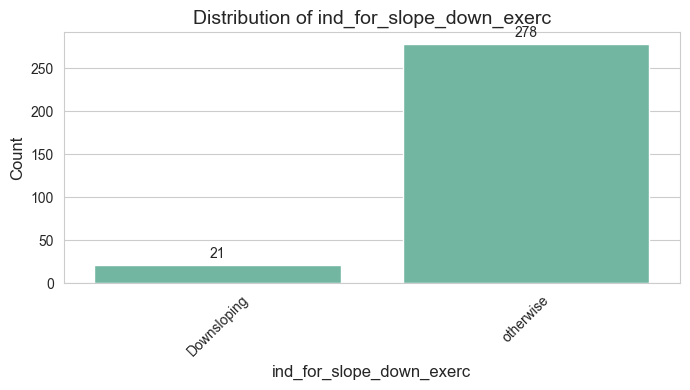

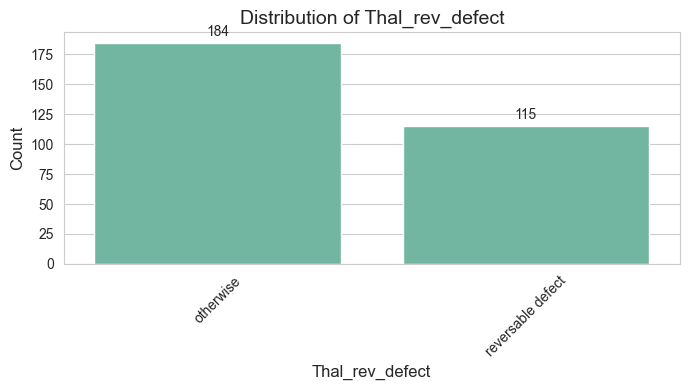

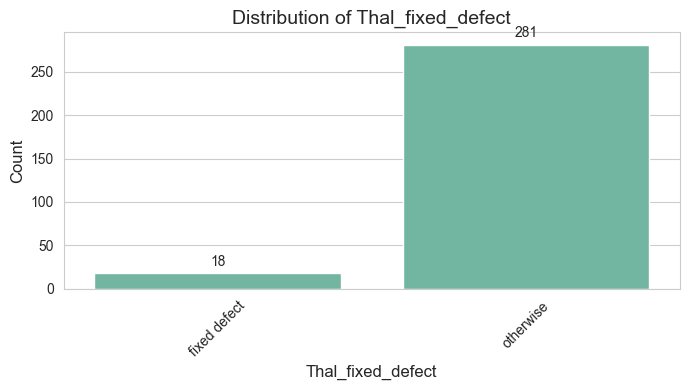

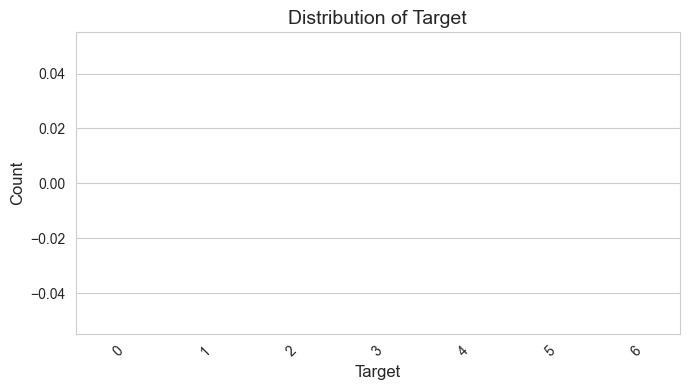

In [16]:
sns.set_style("whitegrid")
sns.set_palette("Set2")

for col in cat_variables:
    plt.figure(figsize=(7, 4))
    ax = sns.countplot(data=My_data, x=col)
    ax.bar_label(ax.containers[0], fmt='%d', label_type='edge', padding=3)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import shap
XGBClassifier (use_label_encoder= False, eva_metric='logloss')

c:\Users\nibug\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eva_metric='logloss', eval_metric=None,
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)

In [18]:
names = ['Logistic Regression', 'Random Forest', 'XGBoost']

classifiers = [
    LogisticRegression(solver='liblinear', random_state=0),
    RandomForestClassifier(n_estimators=100, random_state=0),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)
]

In [19]:
def encode_all_strings(df):
    df_encoded = df.copy()
    le = LabelEncoder()
    for col in df_encoded.columns:
        if df_encoded[col].dtype == 'object':
            df_encoded[col] = le.fit_transform(df_encoded[col])
    return df_encoded
My_data_encoded = encode_all_strings(My_data)
print(My_data_encoded.dtypes)

Disease                       int64
Age                           int64
Sex                           int64
ind_typ_angina                int64
ind_atyp_angina               int64
ind_non_ang_pain              int64
resting_BP                    int64
Serum_cholest                 int64
blood_sugar_exc120            int64
ind_for_ecg_1                 int64
ind_for_ecg_2                 int64
Max_heart_rate                int64
ind_exerc_angina              int64
ST_dep_by_exerc             float64
ind_for_slope_up_exerc        int64
ind_for_slope_down_exerc      int64
num_vessels_fluro             int64
Thal_rev_defect               int64
Thal_fixed_defect             int64
Target                      float64
dtype: object


In [20]:
My_data['Target'] = My_data['Target'].replace({'No disease': 0, 'Disease': 1, -1: 0})
print(My_data['Target'].value_counts(dropna=False))

Target
NaN    299
Name: count, dtype: int64


In [21]:
My_data['Target'] = My_data['Disease'].replace({-1: 0, 1: 1})
print(My_data['Target'].value_counts(dropna=False))

Target
0    161
1    138
Name: count, dtype: int64


In [22]:
def encode_all_strings(df):
    df_encoded = df.copy()
    le = LabelEncoder()
    for col in df_encoded.columns:
        if df_encoded[col].dtype == 'object':
            df_encoded[col] = le.fit_transform(df_encoded[col])
    return df_encoded

My_data_encoded = encode_all_strings(My_data)

In [23]:
X = My_data_encoded.drop(['Target', 'Disease'], axis=1)
y = My_data_encoded['Target']

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=0)

In [25]:
def score_summary(names, classifiers):
    """
    Calculates Accuracy, ROC_AUC, Recall, Precision, and F1-score and returns a DataFrame.
    """
    cols = ["Classifier", "Accuracy", "ROC_AUC", "Recall", "Precision", "F1"]
    results = []

    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        pred = clf.predict(X_val)
        pred_proba = clf.predict_proba(X_val)[:, 1]

        acc = accuracy_score(y_val, pred)
        fpr, tpr, _ = roc_curve(y_val, pred_proba)
        roc_auc = auc(fpr, tpr)
        cm = confusion_matrix(y_val, pred)
        
        recall = cm[1,1] / (cm[1,1] + cm[1,0])
        precision = cm[1,1] / (cm[1,1] + cm[0,1])
        f1 = 2 * recall * precision / (recall + precision)

        results.append([name, acc * 100, roc_auc, recall, precision, f1])
    
    return pd.DataFrame(results, columns=cols).round(2)

In [29]:
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_score,
    recall_score, f1_score, roc_curve, auc
)

In [30]:
results_df = score_summary(names, classifiers)
display(results_df)

c:\Users\nibug\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:46:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Classifier,Accuracy,ROC_AUC,Recall,Precision,F1
0,Logistic Regression,74.67,0.86,0.66,0.81,0.72
1,Random Forest,70.67,0.83,0.61,0.77,0.68
2,XGBoost,70.67,0.84,0.55,0.81,0.66
